In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [4]:
#convert images into vector
image_width = 1080
image_height = 720
total_pixels = image_width*image_height

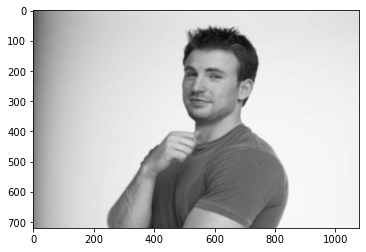

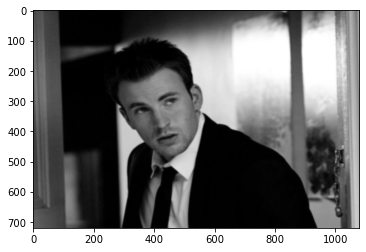

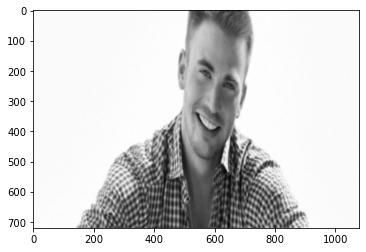

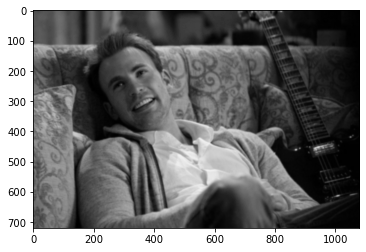

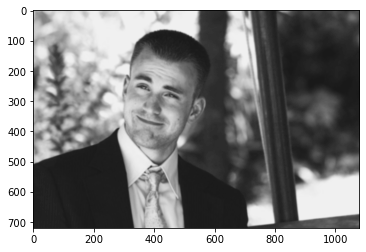

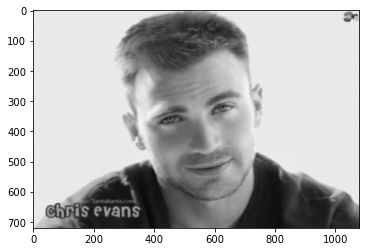

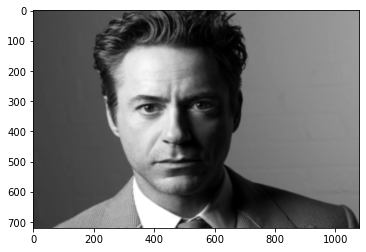

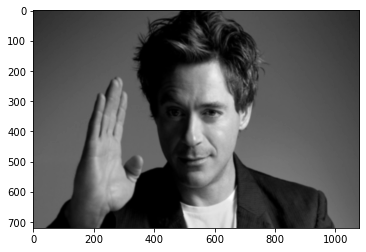

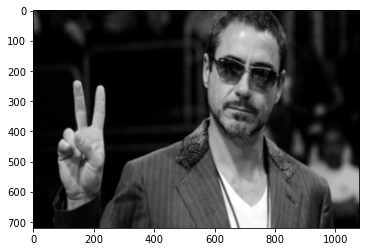

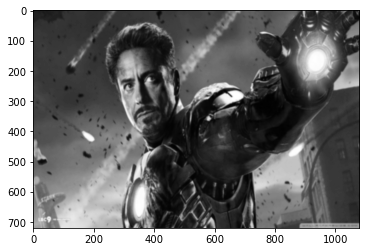

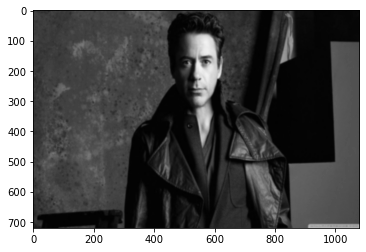

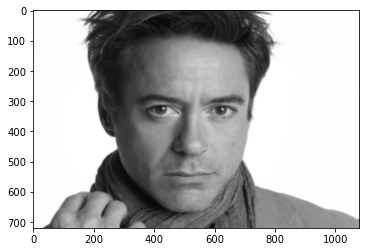

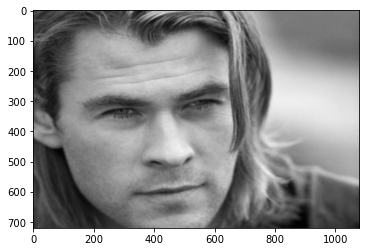

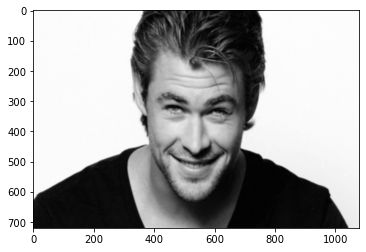

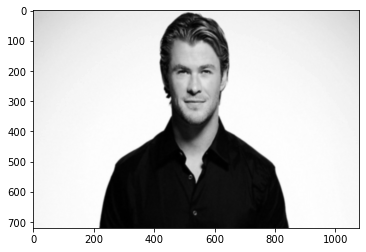

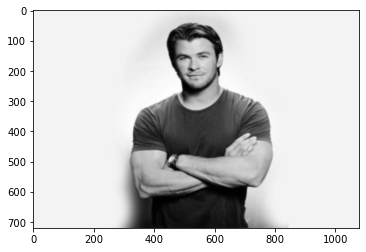

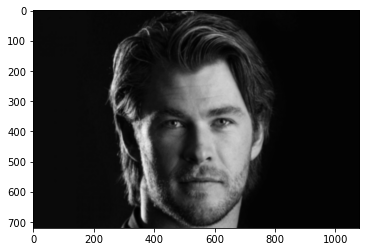

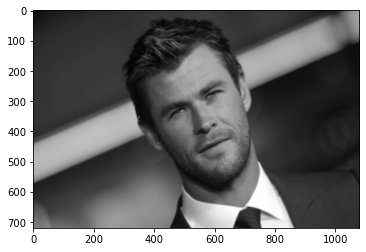

In [42]:
path = "images"
face_vector = []
myList = os.listdir(path)


for cls in myList:
    curImg =cv2.cvtColor(cv2.imread(f"{path}/{cls}"), cv2.COLOR_RGB2GRAY)
    plt.imshow(curImg, cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    curImg = curImg.reshape(total_pixels,)
    face_vector.append(curImg)

In [16]:
face_vector = np.asarray(face_vector)
face_vector = face_vector.transpose()

In [17]:
face_vector.shape

(777600, 18)

In [18]:
face_vector

array([[ 86,  75, 250, ..., 243,  10,  10],
       [ 87,  77, 249, ..., 243,  10,  10],
       [ 89,  72, 248, ..., 243,  10,  10],
       ...,
       [241, 190, 249, ..., 243,   3,  49],
       [241, 186, 249, ..., 243,   3,  49],
       [241, 185, 250, ..., 243,   3,  49]], dtype=uint8)

In [20]:
## Normalizing the face vector
# calculating aaverage face vector
avg_face_vector = face_vector.mean(axis=1)
avg_face_vector = avg_face_vector.reshape(face_vector.shape[0], 1)
# Subtracting average face vector from the face_vector
normalized_face_vector = face_vector - avg_face_vector

In [21]:
normalized_face_vector.shape

(777600, 18)

In [22]:
normalized_face_vector

array([[ -37.05555556,  -48.05555556,  126.94444444, ...,  119.94444444,
        -113.05555556, -113.05555556],
       [ -36.94444444,  -46.94444444,  125.05555556, ...,  119.05555556,
        -113.94444444, -113.94444444],
       [ -34.05555556,  -51.05555556,  124.94444444, ...,  119.94444444,
        -113.05555556, -113.05555556],
       ...,
       [ 118.16666667,   67.16666667,  126.16666667, ...,  120.16666667,
        -119.83333333,  -73.83333333],
       [ 117.83333333,   62.83333333,  125.83333333, ...,  119.83333333,
        -120.16666667,  -74.16666667],
       [ 116.77777778,   60.77777778,  125.77777778, ...,  118.77777778,
        -121.22222222,  -75.22222222]])

In [23]:
# Calculate the Covariance Matrix or the Sigma
covariance_matrix = np.cov(np.transpose(normalized_face_vector))

In [24]:
covariance_matrix

array([[ 2.48137756e+03, -3.46738108e+02,  1.21279214e+03,
        -1.45270519e+03, -3.21393124e+02,  8.56223466e+01,
         5.95803500e+02, -4.15254873e+02, -1.16430720e+03,
        -4.35076923e+01, -4.10864397e+02, -3.70930700e+02,
         2.74992044e+01,  2.18023965e+02,  1.30708421e+03,
         7.73929799e+02, -1.14745809e+03, -1.02897336e+03],
       [-3.46738108e+02,  6.14125016e+03, -4.60756358e+02,
        -6.14513640e+02, -1.46048327e+03, -6.29376863e+01,
        -7.22025081e+01, -7.14126354e+02, -3.01815636e+02,
        -3.39889008e+02, -6.78816183e+02,  3.69537192e+01,
         3.14104939e+02, -6.26155164e+02,  2.32618589e+02,
        -6.61432207e+02, -1.51635476e+02, -2.33425808e+02],
       [ 1.21279214e+03, -4.60756358e+02,  3.20900983e+03,
        -1.67794015e+03, -1.10220673e+02,  8.64941488e+02,
        -2.37550239e+01, -1.06002238e+03, -2.17043555e+03,
        -5.17259071e+02, -4.76750478e+02,  5.27362415e+02,
        -8.75589614e+02,  1.21456037e+03,  2.76175326e

In [26]:
# Calculate Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [104]:
# Select the K best Eigen Faces, K < M
print(eigen_vectors.shape)
k = 7
k_eigen_vectors = eigen_vectors[0:k, :]
print(k_eigen_vectors.shape)

(18, 18)
(7, 18)


In [105]:
# Converting lower dimensionality K Eigen Vectors to Original Dimensionality
eigen_faces = k_eigen_vectors.dot(np.transpose(normalized_face_vector))
eigen_faces.shape


(7, 777600)

In [106]:
#  Represent Each eigen face as combination of the K Eigen Vectors
weights = np.transpose(normalized_face_vector).dot(np.transpose(eigen_faces))
weights

array([[-2.05159360e+09, -2.58394684e+09,  1.66280238e+08,
        -1.25894123e+09,  1.60510249e+09, -2.63805636e+09,
         6.30949094e+08],
       [-1.40558935e+08,  2.16769275e+09, -5.61615783e+08,
         6.35479121e+08, -2.27742005e+09,  2.05150444e+09,
         6.26909945e+08],
       [-2.92676043e+09, -3.97563447e+09, -1.32658755e+09,
        -6.63607111e+08,  2.96787506e+09, -4.04117358e+09,
         6.42740902e+08],
       [ 1.43931251e+09,  3.21639414e+08,  1.65221697e+09,
         1.23488557e+09, -8.40120187e+08,  2.93483627e+09,
        -1.56165803e+09],
       [-5.18764050e+08,  1.48522252e+09,  5.22497110e+08,
         9.08996050e+08,  1.21698336e+09,  1.40013316e+09,
        -1.47592604e+09],
       [-2.45029164e+09, -2.32478670e+09, -1.92284817e+09,
        -1.13336102e+09,  3.98940888e+08, -3.23639977e+09,
         4.01585255e+08],
       [ 1.32420713e+09,  3.85239749e+08,  1.51355535e+09,
         1.64419607e+07, -1.51259129e+09,  1.54849647e+09,
         3.5902527

In [107]:
# testing the model
test_img1 = cv2.imread('test/test2.jpg')
test_img1 = cv2.cvtColor(test_img1, cv2.COLOR_RGB2GRAY)

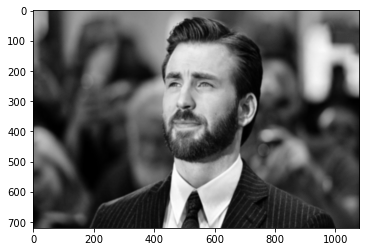

In [108]:
plt.imshow(test_img1, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [109]:
test_img1 = test_img1.reshape(total_pixels, 1)
test_normalized_face_vector = test_img1 - avg_face_vector
test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))


index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1))    

In [110]:
# from index 1 to 6 chris Evan
index

6